In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
classes = ['02_STROMA','06_MUCOSA','05_DEBRIS','01_TUMOR','03_COMPLEX','08_EMPTY','04_LYMPHO','07_ADIPOSE']

In [5]:
base_dir = "/content/drive/MyDrive/Kather_texture_2016_image_tiles_5000"

In [6]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.tif')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

02_STROMA: 0 Images
06_MUCOSA: 0 Images
05_DEBRIS: 0 Images
01_TUMOR: 0 Images
03_COMPLEX: 0 Images
08_EMPTY: 0 Images
04_LYMPHO: 0 Images
07_ADIPOSE: 0 Images


In [7]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [8]:
batch_size = 100
IMG_SHAPE = 150 

In [9]:
 image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

Found 4000 images belonging to 8 classes.


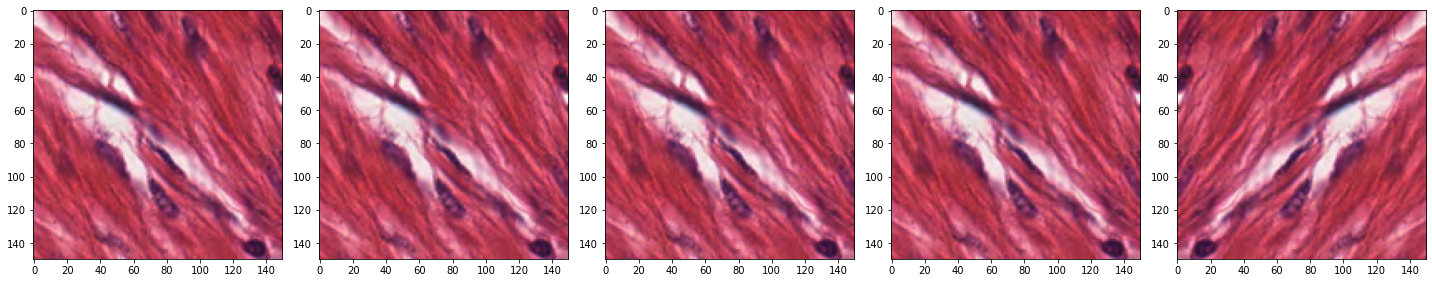

In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [11]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 4000 images belonging to 8 classes.


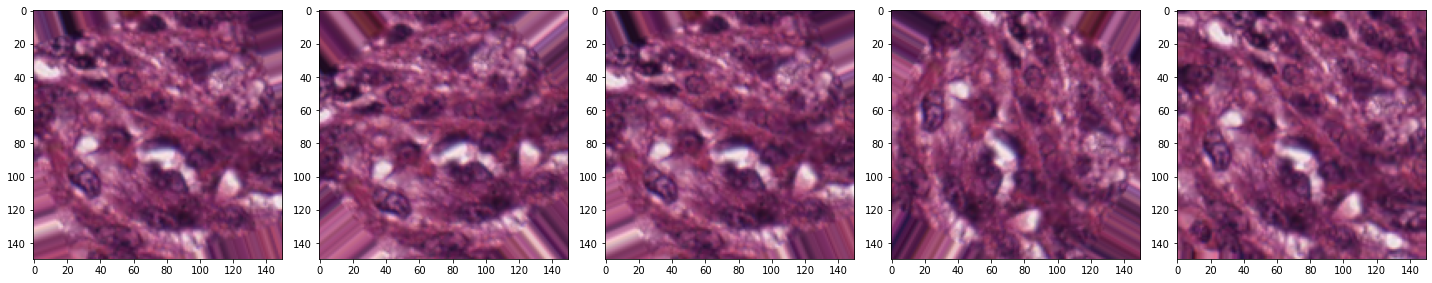

In [12]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [13]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

Found 4000 images belonging to 8 classes.


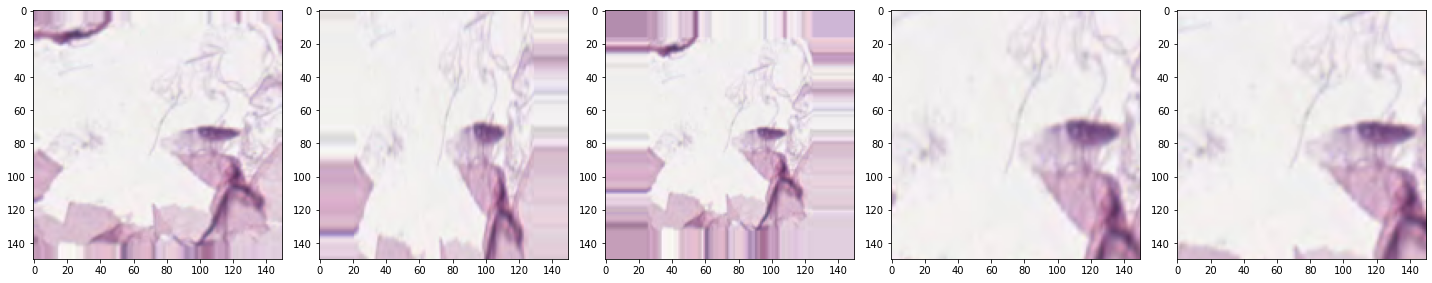

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [15]:
 image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 4000 images belonging to 8 classes.


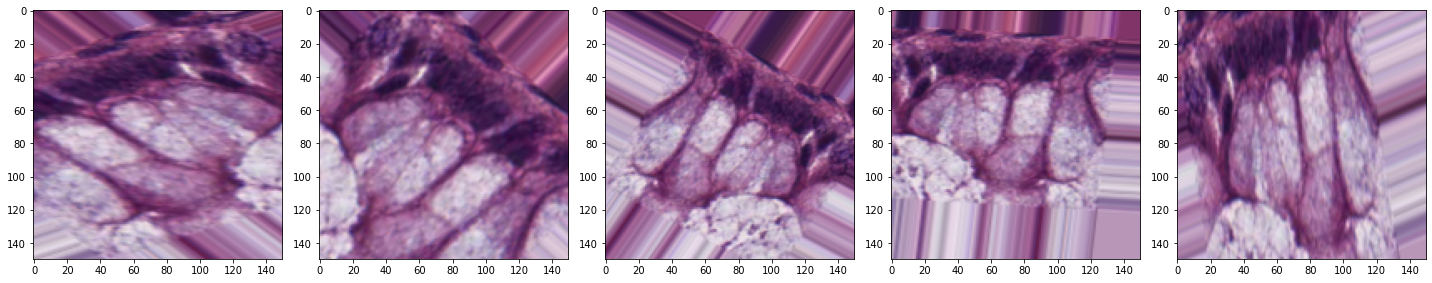

In [16]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [17]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 1000 images belonging to 8 classes.


In [18]:
from tensorflow.keras.models import Sequential

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(8, activation='softmax'))

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
epochs = 20

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

<ipython-input-22-b9db8152fbfc>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
40/40 [==============================] - 642s 16s/step - loss: 1.2158 - accuracy: 0.4793 - val_loss: 0.8447 - val_accuracy: 0.6660
Epoch 2/20
40/40 [==============================] - 148s 4s/step - loss: 0.8521 - accuracy: 0.6425 - val_loss: 0.6717 - val_accuracy: 0.7250
Epoch 3/20
40/40 [==============================] - 152s 4s/step - loss: 0.7692 - accuracy: 0.6835 - val_loss: 0.6644 - val_accuracy: 0.7750
Epoch 4/20
40/40 [==============================] - 149s 4s/step - loss: 0.7132 - accuracy: 0.7122 - val_loss: 0.5842 - val_accuracy: 0.8030
Epoch 5/20
40/40 [==============================] - 148s 4s/step - loss: 0.6669 - accuracy: 0.7260 - val_loss: 0.5360 - val_accuracy: 0.7930
Epoch 6/20
40/40 [==============================] - 160s 4s/step - loss: 0.6158 - accuracy: 0.7607 - val_loss: 0.5126 - val_accuracy: 0.8150
Epoch 7/20
40/40 [==============================] - 147s 4s/step - loss: 0.6418 - accuracy: 0.7427 - val_loss: 0.5307 - val_accuracy: 0.7900
Epoch 8/20
4

In [23]:
model.save('model.h5')

In [26]:
model.save('/content/gdrive/My Drive/Colab_Models/model_{}.h5')

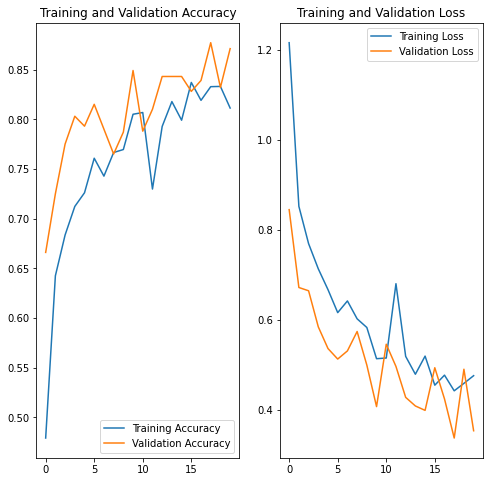

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#test image 10B61_CRC-Prim-HE-09_022.tif_Row_301_Col_1.tif

In [28]:
import cv2

In [36]:
image = cv2.imread('/content/drive/MyDrive/Kather_texture_2016_image_tiles_5000/train/01_TUMOR/10009_CRC-Prim-HE-03_009.tif_Row_301_Col_151.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (150, 150))

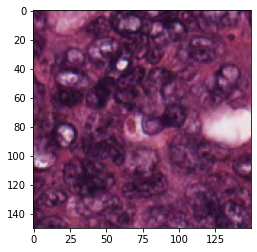

In [41]:
plt.imshow(image)

In [30]:
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [43]:
image_test = img_to_array(image)
image_test = preprocess_input(image_test)
image_test = np.expand_dims(image_test, axis=0)
pred = np.argmin(model.predict(image_test))
pred = model.predict(image_test)
print(pred)

1/1 [==============================] - 0s 32ms/step
[[0. 0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread("image.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold the image to binarize it
_, thresholded_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on the original image
cv2.drawContours(image, contours, -1, (0, 255, 0), 2)

# Show the original image with the contours
cv2.imshow("Contours", image)
cv2.waitKey(0)
cv2.destroyAllWindows()